<a href="https://colab.research.google.com/github/vishnudas-1212/machine-learning/blob/main/Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df=pd.read_csv('/content/titanic.csv')

In [130]:
df

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
887,1,19.000000,30.0000,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
888,0,29.699118,23.4500,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
889,1,26.000000,30.0000,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [131]:
x=df.iloc[:,1:]

In [132]:
y=df.iloc[:,0]

In [133]:
#checking for missing values

df.isna().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=42)

In [136]:
#train  model

from sklearn.ensemble import RandomForestClassifier

In [137]:
model=RandomForestClassifier(random_state=10,max_depth=5,min_samples_leaf=5,n_estimators=5)   #default random classifier

In [138]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [139]:
y_pred=model.predict(x_test)

In [140]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0])

In [141]:
#evaluation

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [142]:
accuracy_score(y_test,y_pred)

0.7951219512195122

In [143]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Survived,,
0,108,13
1,29,55


In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       121
           1       0.81      0.65      0.72        84

    accuracy                           0.80       205
   macro avg       0.80      0.77      0.78       205
weighted avg       0.80      0.80      0.79       205



In [164]:
x_train.shape

(686, 24)

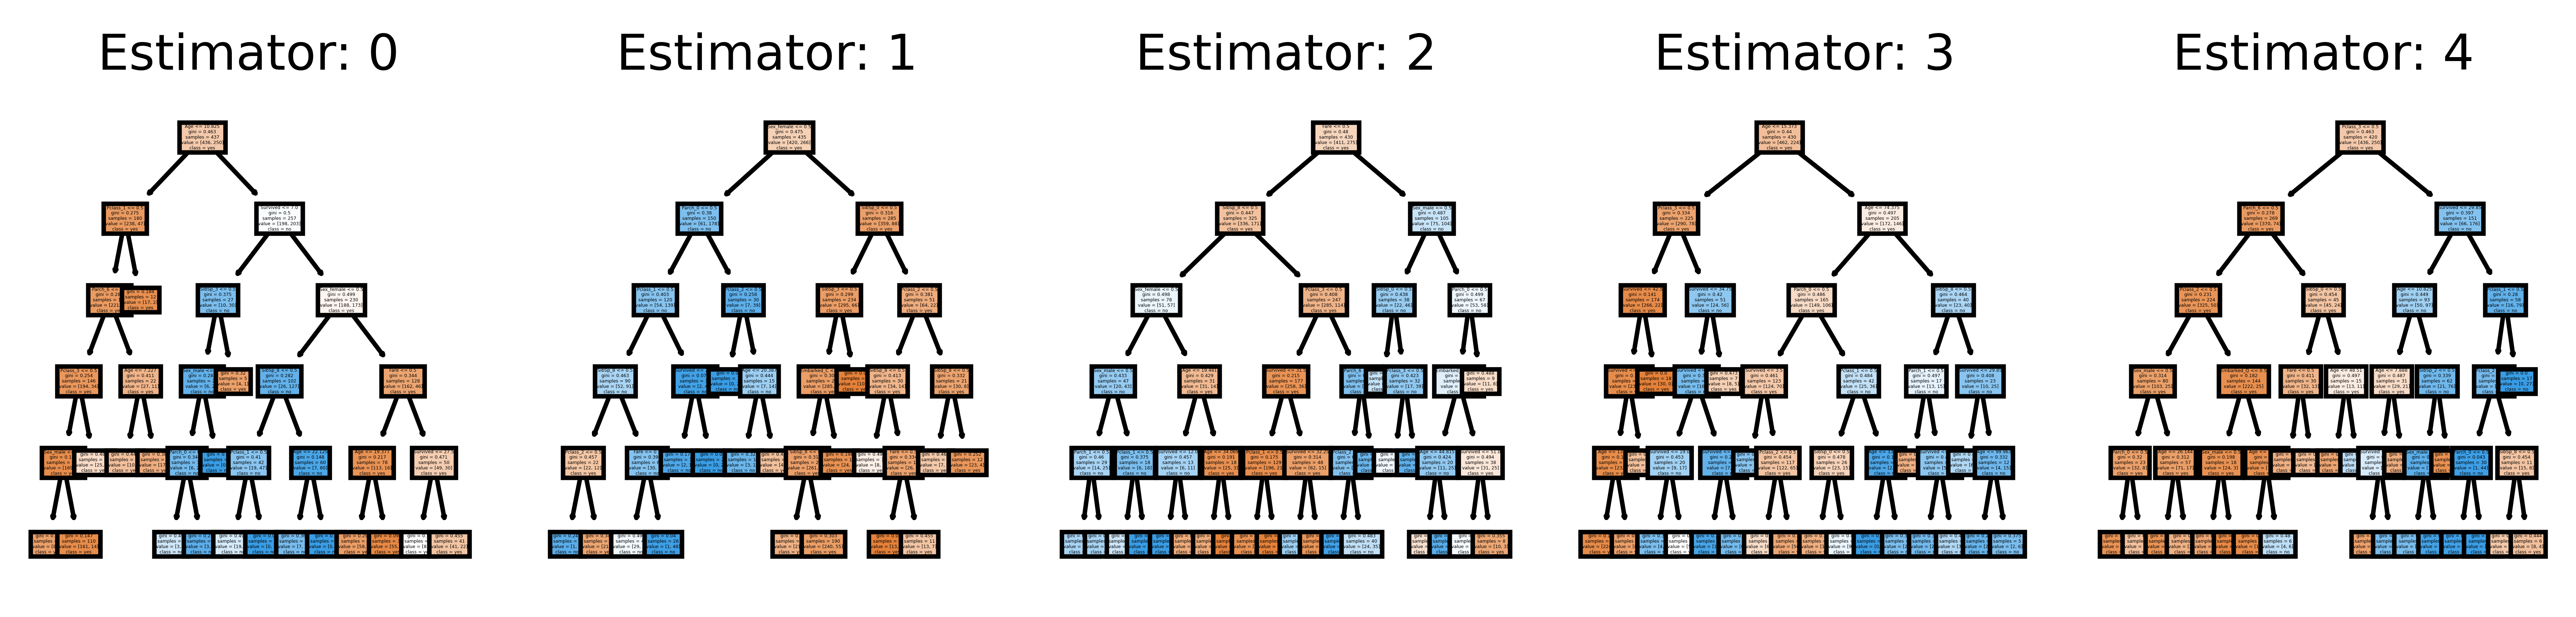

In [161]:
from sklearn import tree
fn=df.columns
fig,axes=plt.subplots(nrows=1,ncols=5,figsize=(10,2),dpi=900)
for index in range(0,5):
  tree.plot_tree(model.estimators_[index],
                 feature_names=fn,
                 class_names=['yes','no'],
                 filled=True,
                 ax = axes[index]
                );


  axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [156]:
df.describe

<bound method NDFrame.describe of      Survived        Age     Fare  ...  Embarked_C  Embarked_Q  Embarked_S
0           0  22.000000   7.2500  ...           0           0           1
1           1  38.000000  71.2833  ...           1           0           0
2           1  26.000000   7.9250  ...           0           0           1
3           1  35.000000  53.1000  ...           0           0           1
4           0  35.000000   8.0500  ...           0           0           1
..        ...        ...      ...  ...         ...         ...         ...
886         0  27.000000  13.0000  ...           0           0           1
887         1  19.000000  30.0000  ...           0           0           1
888         0  29.699118  23.4500  ...           0           0           1
889         1  26.000000  30.0000  ...           1           0           0
890         0  32.000000   7.7500  ...           0           1           0

[891 rows x 25 columns]>

In [159]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [160]:
y_test.value_counts()

0    121
1     84
Name: Survived, dtype: int64